# The Machine Learning Task: Predict In-hospital Mortality Within 48 Hours After Admission

For this machine learning task, the 14 features are used to make in-hospital mortality predictions. 

'Capillary refill rate',
'Diastolic blood pressure',
'Glascow coma scale total',
'Glucose',
'Heart Rate',
'Height',
'Mean blood pressure',
'Oxygen saturation',
'Respiratory rate',
'Systolic blood pressure',
'Temperature', 
'Weight',
'pH'


# Understand MIMIC-III Electronic Health Record Dataset

Homepage: https://mimic.physionet.org

- How many variables are present in the dataset?
- What is the total number of patients or samples included?
- What constitutes the label?
- What steps are required to transform the data into a format compatible with the model?

## MIMIC-III Data Aggregation

## Data Aggregation

In [2]:
import pandas as pd
import numpy as np


TASK_FOLDER = '/Users/xyz/Documents/data/in_hospital_mortality'
features = ['Capillary refill rate',
            'Diastolic blood pressure',
            'Fraction inspired oxygen',
            'Glascow coma scale total',
            'Glucose',
            'Heart Rate',
            'Height',
            'Mean blood pressure',
            'Oxygen saturation',
            'Respiratory rate',
            'Systolic blood pressure',
            'Temperature', 
            'Weight',
            'pH',
            ]

N_train = 'all' # (int) number of sample or 'all'
observation_window = 48
method = 'min'  # method to do aggregation: 'max', 'min', 'mean', 'median'
                
# load label file
train_label = pd.read_csv(TASK_FOLDER + '/train/label.csv', header=0)

# aggregation
data = []
subj_list = []
labels = []
for idx, row in train_label.iterrows():
    subj, label = row['stay'], row['y_true']
    
    if N_train != 'all' and idx >= N_train:
        break
    
    subj_df = pd.read_csv(TASK_FOLDER + '/train/' + subj, header=0)
    
    subj_df = subj_df[['Hours'] + features]
    
  
    if method == 'max':
        aggregate_data = np.nanmax(subj_df[features].values, axis=0)
    
    elif method == 'min':
        aggregate_data = np.nanmin(subj_df[features].values, axis=0)
        
    elif method == 'mean':
        aggregate_data = np.nanmean(subj_df[features].values, axis=0) 
        
    elif method == 'median':
        aggregate_data = np.nanmedian(subj_df[features].values, axis=0)
        
    
    data.append(aggregate_data)
    subj_list.append(subj)
    labels.append(label)
    
feature_name = [(ft + '_' + method) for ft in features]
data_df = pd.DataFrame()
data_df['Subj'] = subj_list
data_df[feature_name] = data
data_df['label'] = labels

data_df.to_csv(TASK_FOLDER + '_%s_day_%s.csv' % (observation_window, method), index=False)        

Task: to predict whether the cancer is benign or malignant

In [3]:
# load data set into DataFrame

import pandas as pd

import numpy as np

In [4]:
data = pd.read_csv(TASK_FOLDER + 'in_hospital_mortality_48_day_min.csv', 
                   header=0)

In [5]:
data.head(10)

,Subj,Capillary refill rate_min,Diastolic blood pressure_min,Fraction inspired oxygen_min,Glascow coma scale total_min,Glucose_min,Heart Rate_min,Height_min,Mean blood pressure_min,Oxygen saturation_min,Respiratory rate_min,Systolic blood pressure_min,Temperature_min,Weight_min,pH_min,label
0,76541_episode1_timeseries.csv,NaN,45.0,0.4,NaN,148.0,70.0,168.0,59.000000,86.0,13.0,90.0,35.277778,60.463814,6.50,0
1,12797_episode1_timeseries.csv,NaN,47.0,NaN,8.0,85.0,89.0,NaN,68.000000,92.0,2.0,103.0,36.277802,50.299999,7.43,0
2,9027_episode1_timeseries.csv,NaN,44.0,0.5,3.0,63.0,72.0,NaN,57.000000,90.0,10.0,82.0,34.700001,84.199997,7.36,0
3,40386_episode1_timeseries.csv,NaN,33.0,0.5,NaN,85.0,60.0,168.0,51.000000,60.0,0.0,87.0,35.611111,61.461716,7.00,0
4,22933_episode1_timeseries.csv,NaN,36.0,NaN,15.0,92.0,69.0,NaN,53.000000,90.0,12.0,80.0,35.833333,NaN,7.31,0
5,48770_episode1_timeseries.csv,NaN,63.0,NaN,NaN,90.0,51.0,NaN,74.000000,94.0,11.0,106.0,36.611111,76.339534,NaN,0
6,14037_episode1_timeseries.csv,NaN,47.0,NaN,13.0,70.0,48.0,NaN,61.666698,94.0,9.0,90.0,35.000000,75.599998,NaN,0
7,15656_episode1_timeseries.csv,NaN,26.0,NaN,8.0,111.0,91.0,NaN,39.000000,92.0,17.0,75.0,35.555599,NaN,7.00,1
8,24771_episode1_timeseries.csv,NaN,54.0,NaN,7.0,109.0,78.0,NaN,72.000000,97.0,2.0,116.0,36.666698,NaN,7.27,0
9,83338_episode1_timeseries.csv,NaN,33.0,0.5,NaN,90.0,77.0,NaN,47.000000,96.0,14.0,84.0,36.111111,78.000000,7.44,1


In [6]:
# To explore the number of cases (death) and controls (alive finally) 

n_case = len(data[data['label'] == 1])
n_control = len(data[data['label'] == 0]) 

print('Number of cases: ', n_case) 
print('Number of controls : ', n_control)
print()
print('Proportion of case: %.2f%%' % (100 * n_case / (n_control + n_case)))


Number of cases:  2423
Number of controls :  15480

Proportion of case: 13.53%


In [7]:
# visualize case-control distribution

import matplotlib.pyplot as plt
plt.bar(['Cases (death)','Controls (alive, discharge)'], [n_case, n_control]) 

plt.ylabel('number of subjects') 


Text(0, 0.5, 'number of subjects')

Split the data into training and testing sets

In [8]:
# To assess missing values

print(data.isnull().sum() / len(data))

Subj                            0.000000
Capillary refill rate_min       0.981958
Diastolic blood pressure_min    0.011953
Fraction inspired oxygen_min    0.703458
Glascow coma scale total_min    0.419818
Glucose_min                     0.000950
Heart Rate_min                  0.011953
Height_min                      0.810926
Mean blood pressure_min         0.012065
Oxygen saturation_min           0.006703
Respiratory rate_min            0.012288
Systolic blood pressure_min     0.011953
Temperature_min                 0.019494
Weight_min                      0.270960
pH_min                          0.174663
label                           0.000000
dtype: float64


In [9]:
# drop feature 'Capillary refill rate_min' since high missingness

data = data.drop(columns = ['Capillary refill rate_min'])

In [10]:
data

,Subj,Diastolic blood pressure_min,Fraction inspired oxygen_min,Glascow coma scale total_min,Glucose_min,Heart Rate_min,Height_min,Mean blood pressure_min,Oxygen saturation_min,Respiratory rate_min,Systolic blood pressure_min,Temperature_min,Weight_min,pH_min,label
0,76541_episode1_timeseries.csv,45.0,0.40,NaN,148.0,70.0,168.0,59.000000,86.0,13.0,90.0,35.277778,60.463814,6.50,0
1,12797_episode1_timeseries.csv,47.0,NaN,8.0,85.0,89.0,NaN,68.000000,92.0,2.0,103.0,36.277802,50.299999,7.43,0
2,9027_episode1_timeseries.csv,44.0,0.50,3.0,63.0,72.0,NaN,57.000000,90.0,10.0,82.0,34.700001,84.199997,7.36,0
3,40386_episode1_timeseries.csv,33.0,0.50,NaN,85.0,60.0,168.0,51.000000,60.0,0.0,87.0,35.611111,61.461716,7.00,0
4,22933_episode1_timeseries.csv,36.0,NaN,15.0,92.0,69.0,NaN,53.000000,90.0,12.0,80.0,35.833333,NaN,7.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,50762_episode1_timeseries.csv,48.0,0.04,NaN,263.0,76.0,173.0,56.000000,61.0,14.0,92.0,36.111111,167.647603,5.00,0
17899,12348_episode1_timeseries.csv,35.0,NaN,6.0,87.0,59.0,NaN,53.333302,96.0,6.0,90.0,36.277802,NaN,6.50,0
17900,71713_episode1_timeseries.csv,53.0,NaN,NaN,98.0,53.0,NaN,72.000000,92.0,8.0,97.0,36.666667,78.652853,NaN,0
17901,69395_episode1_timeseries.csv,40.0,0.50,NaN,66.0,46.0,185.0,43.000000,68.0,7.0,52.0,36.388889,83.823802,NaN,0


In [11]:
data.drop(columns = ['label']).describe()

,Diastolic blood pressure_min,Fraction inspired oxygen_min,Glascow coma scale total_min,Glucose_min,Heart Rate_min,Height_min,Mean blood pressure_min,Oxygen saturation_min,Respiratory rate_min,Systolic blood pressure_min,Temperature_min,Weight_min,pH_min
count,17689.000000,5309.000000,10387.000000,17886.000000,17689.000000,3385.000000,17687.000000,17783.000000,17683.000000,17689.000000,17554.000000,13052.000000,14776.000000
mean,39.964459,0.422389,8.767113,95.307206,68.431251,168.548597,53.988573,84.016775,8.605129,85.950386,35.805119,81.416817,6.600238
std,12.032213,0.155498,4.790284,27.783699,14.676653,14.862592,15.226982,14.834182,5.549584,20.012562,2.135860,24.508092,1.955086
min,-13.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-37.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,34.000000,0.400000,3.000000,78.000000,59.000000,160.000000,48.000000,79.000000,3.000000,77.000000,35.555556,65.500000,5.500000
50%,41.000000,0.400000,8.000000,94.000000,68.000000,170.000000,55.000000,90.000000,9.000000,86.000000,36.000000,78.000000,7.240000
75%,47.000000,0.500000,14.000000,110.000000,78.000000,178.000000,62.000000,93.000000,13.000000,97.000000,36.388889,93.326554,7.350000
max,89.000000,1.000000,15.000000,592.000000,140.000000,429.000000,107.333000,100.000000,29.000000,157.000000,39.000000,280.000000,99.000000


In [12]:
# Split data into Training (75%) and Testing (25%) sets
from sklearn.model_selection import train_test_split 

y = data['label'].values

X = data.drop(columns = ['Subj', 'label']).values

feature_used = data.drop(columns = ['Subj', 'label']).columns.tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=0) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(13427, 13) (4476, 13) (13427,) (4476,)


In [13]:
feature_used


['Diastolic blood pressure_min',
 'Fraction inspired oxygen_min',
 'Glascow coma scale total_min',
 'Glucose_min',
 'Heart Rate_min',
 'Height_min',
 'Mean blood pressure_min',
 'Oxygen saturation_min',
 'Respiratory rate_min',
 'Systolic blood pressure_min',
 'Temperature_min',
 'Weight_min',
 'pH_min']

In [14]:
# impute the missing values
from sklearn.impute import SimpleImputer

# if your sklearn version <= 0.20
# Do:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values=np.nan, strategy='mean')

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X_train)
X_train = np.array(imputer.transform(X_train), dtype=np.float32)
X_test = np.array(imputer.transform(X_test), dtype=np.float32)


In [15]:
# Train the decision tree classifier using training set
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Export a decision tree

# define a tree 
tree = DecisionTreeClassifier(criterion='gini', 
                              class_weight = 'balanced', random_state=0) 

# train the tree
tree.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Tips: before training a model, please check the documentation at Sciki-learn site: https://scikit-learn.org/stable/user_guide.html


For more details of decision Tree, please read: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTree


In [16]:
# Use the trained classifer to predict in test set 
y_pred = tree.predict(X_test)


In [17]:
# Evaluate the prediction performance
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3881
           1       0.21      0.22      0.22       595

    accuracy                           0.79      4476
   macro avg       0.55      0.55      0.55      4476
weighted avg       0.79      0.79      0.79      4476



- macro average: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account;


-  microaverage: Calculate metrics globally by counting the total true positives, false negatives and false positives;


- weighted average: Calculate metrics for each label, and find their average weighted by sup- port (the number of true instances for each label).

In [18]:
# Visualization of decision tree
import graphviz # Run following code in command line:
                # conda install python-graphviz

dot_data = export_graphviz(tree, out_file=None,
                           feature_names=feature_used, 
                           filled=True, rounded=True, 
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree",cleanup=True)

'decision_tree.pdf'

In [19]:
# Model interpretaion 

# Importance of features

importances = tree.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature importances ranking:") 

for f in range(X.shape[1]):
    print(f) 
    print('{0:.2f}%'.format(importances[indices[f]]*100).rjust(6, ' '),
          'feature %d: %s ' % (indices[f], feature_used[indices[f]]))

Feature importances ranking:
0
11.85% feature 9: Systolic blood pressure_min 
1
10.63% feature 3: Glucose_min 
2
10.28% feature 4: Heart Rate_min 
3
 9.19% feature 10: Temperature_min 
4
 9.09% feature 11: Weight_min 
5
 8.51% feature 12: pH_min 
6
 8.48% feature 7: Oxygen saturation_min 
7
 7.58% feature 6: Mean blood pressure_min 
8
 6.84% feature 2: Glascow coma scale total_min 
9
 6.61% feature 8: Respiratory rate_min 
10
 6.02% feature 0: Diastolic blood pressure_min 
11
 2.89% feature 1: Fraction inspired oxygen_min 
12
 2.03% feature 5: Height_min 


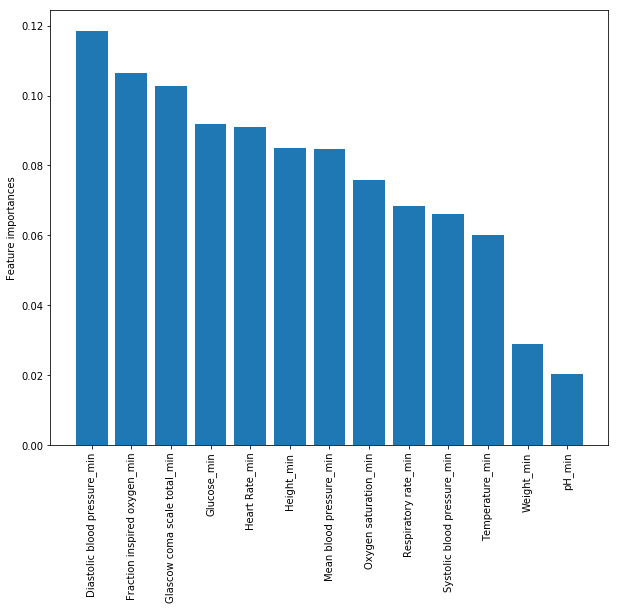

In [20]:
# Plot the feature importances of the forest

plt.figure(figsize=(10, 8))

plt.ylabel("Feature importances")

plt.bar(range(len(feature_used)), importances[indices], align="center") 

plt.xticks(range(len(feature_used)), feature_used, rotation=90)

plt.show()

Tuning model: search for the optimal model parameters.
Parameter to tune:
( https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
)

- max_depth: The maximum depth of the tree.


- min_samples_split: The minimum number of samples required to split an internal node


- min_samples_leaf: The minimum number of samples required to be at a leaf node.


- max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.


- class_weight: weight of class label (addressing imbalanced data)


In [21]:
# load data set into DataFrame

import pandas as pd

import numpy as np


data = pd.read_csv('data/in_hospital_mortality_48_day_min.csv', 
                  header = 0)

In [22]:
# To explore the number of cases (death) and controls (alive finally) 

n_case = len(data[data['label'] == 1])
n_control = len(data[data['label'] == 0]) 

print('Number of cases: ', n_case) 
print('Number of controls : ', n_control)
print()
print('Proportion of case: %.2f%%' % (100 * n_case / (n_control + n_case)))


Number of cases:  2423
Number of controls :  15480

Proportion of case: 13.53%


Text(0, 0.5, 'number of subjects')

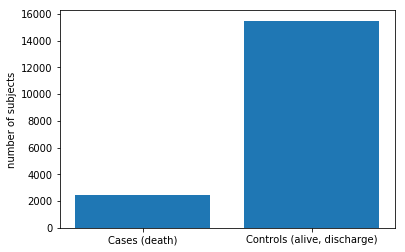

In [23]:
# visualize case-control distribution

import matplotlib.pyplot as plt
plt.bar(['Cases (death)','Controls (alive, discharge)'], [n_case, n_control]) 

plt.ylabel('number of subjects') 



In [24]:
# To assess missing values

print(data.isnull().sum() / len(data))

Subj                            0.000000
Capillary refill rate_min       0.981958
Diastolic blood pressure_min    0.011953
Fraction inspired oxygen_min    0.703458
Glascow coma scale total_min    0.419818
Glucose_min                     0.000950
Heart Rate_min                  0.011953
Height_min                      0.810926
Mean blood pressure_min         0.012065
Oxygen saturation_min           0.006703
Respiratory rate_min            0.012288
Systolic blood pressure_min     0.011953
Temperature_min                 0.019494
Weight_min                      0.270960
pH_min                          0.174663
label                           0.000000
dtype: float64


In [25]:
# drop feature 'Capillary refill rate_min' since high missingness

data = data.drop(columns = ['Capillary refill rate_min'])

In [26]:
data

,Subj,Diastolic blood pressure_min,Fraction inspired oxygen_min,Glascow coma scale total_min,Glucose_min,Heart Rate_min,Height_min,Mean blood pressure_min,Oxygen saturation_min,Respiratory rate_min,Systolic blood pressure_min,Temperature_min,Weight_min,pH_min,label
0,76541_episode1_timeseries.csv,45.0,0.40,NaN,148.0,70.0,168.0,59.000000,86.0,13.0,90.0,35.277778,60.463814,6.50,0
1,12797_episode1_timeseries.csv,47.0,NaN,8.0,85.0,89.0,NaN,68.000000,92.0,2.0,103.0,36.277802,50.299999,7.43,0
2,9027_episode1_timeseries.csv,44.0,0.50,3.0,63.0,72.0,NaN,57.000000,90.0,10.0,82.0,34.700001,84.199997,7.36,0
3,40386_episode1_timeseries.csv,33.0,0.50,NaN,85.0,60.0,168.0,51.000000,60.0,0.0,87.0,35.611111,61.461716,7.00,0
4,22933_episode1_timeseries.csv,36.0,NaN,15.0,92.0,69.0,NaN,53.000000,90.0,12.0,80.0,35.833333,NaN,7.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,50762_episode1_timeseries.csv,48.0,0.04,NaN,263.0,76.0,173.0,56.000000,61.0,14.0,92.0,36.111111,167.647603,5.00,0
17899,12348_episode1_timeseries.csv,35.0,NaN,6.0,87.0,59.0,NaN,53.333302,96.0,6.0,90.0,36.277802,NaN,6.50,0
17900,71713_episode1_timeseries.csv,53.0,NaN,NaN,98.0,53.0,NaN,72.000000,92.0,8.0,97.0,36.666667,78.652853,NaN,0
17901,69395_episode1_timeseries.csv,40.0,0.50,NaN,66.0,46.0,185.0,43.000000,68.0,7.0,52.0,36.388889,83.823802,NaN,0


In [27]:
data.drop(columns = ['label']).describe()

,Diastolic blood pressure_min,Fraction inspired oxygen_min,Glascow coma scale total_min,Glucose_min,Heart Rate_min,Height_min,Mean blood pressure_min,Oxygen saturation_min,Respiratory rate_min,Systolic blood pressure_min,Temperature_min,Weight_min,pH_min
count,17689.000000,5309.000000,10387.000000,17886.000000,17689.000000,3385.000000,17687.000000,17783.000000,17683.000000,17689.000000,17554.000000,13052.000000,14776.000000
mean,39.964459,0.422389,8.767113,95.307206,68.431251,168.548597,53.988573,84.016775,8.605129,85.950386,35.805119,81.416817,6.600238
std,12.032213,0.155498,4.790284,27.783699,14.676653,14.862592,15.226982,14.834182,5.549584,20.012562,2.135860,24.508092,1.955086
min,-13.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-37.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,34.000000,0.400000,3.000000,78.000000,59.000000,160.000000,48.000000,79.000000,3.000000,77.000000,35.555556,65.500000,5.500000
50%,41.000000,0.400000,8.000000,94.000000,68.000000,170.000000,55.000000,90.000000,9.000000,86.000000,36.000000,78.000000,7.240000
75%,47.000000,0.500000,14.000000,110.000000,78.000000,178.000000,62.000000,93.000000,13.000000,97.000000,36.388889,93.326554,7.350000
max,89.000000,1.000000,15.000000,592.000000,140.000000,429.000000,107.333000,100.000000,29.000000,157.000000,39.000000,280.000000,99.000000


In [28]:
# Split data into Training (75%) and Testing (25%) sets
from sklearn.model_selection import train_test_split 

y = data['label'].values

X = data.drop(columns = ['Subj', 'label']).values

feature_used = data.drop(columns = ['Subj', 'label']).columns.tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=0) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(13427, 13) (4476, 13) (13427,) (4476,)


In [29]:
# impute the missing values
from sklearn.impute import SimpleImputer

# if your sklearn version <= 0.20
# Do:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values=np.nan, strategy='mean')

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X_train)
X_train = np.array(imputer.transform(X_train), dtype=np.float32)
X_test = np.array(imputer.transform(X_test), dtype=np.float32)



In [30]:
# Train model using Grid Search with cross validation
# The goal is to identify the best hyper-parameters of the model

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

# set grid search for decision tree clssifier
tree = DecisionTreeClassifier(criterion='gini', random_state=0, class_weight = 'balanced') 
grid = GridSearchCV(tree,
                    param_grid={'max_depth': range(2, 10)},
                    scoring='accuracy', cv=10,
                    return_train_score=True)

grid.fit(X_train, y_train)
scores = pd.DataFrame(grid.cv_results_)


In [31]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.014741,0.000878,0.000508,0.000035,2,{'max_depth': 2},0.529412,0.583023,0.583768,0.549516,...,0.575058,0.560659,0.600629,0.582340,0.576961,0.551593,0.556971,0.539015,0.568689,0.022288
1,0.016047,0.000973,0.000402,0.000026,3,{'max_depth': 3},0.695458,0.709605,0.600149,0.634401,...,0.595498,0.650116,0.622807,0.638779,0.694307,0.500703,0.527265,0.729499,0.637556,0.074272
2,0.019790,0.000134,0.000399,0.000016,4,{'max_depth': 4},0.689501,0.709605,0.682055,0.679077,...,0.679907,0.699768,0.668239,0.648875,0.670391,0.725279,0.754986,0.700455,0.696283,0.030800
3,0.026339,0.002262,0.000464,0.000062,5,{'max_depth': 5},0.690246,0.684289,0.627699,0.667908,...,0.636958,0.692486,0.676928,0.670887,0.643827,0.717418,0.744311,0.703434,0.690474,0.031794
4,0.032771,0.002358,0.000482,0.000027,6,{'max_depth': 6},0.678332,0.667908,0.672375,0.620998,...,0.711437,0.652350,0.704568,0.691824,0.701837,0.688622,0.691105,0.757385,0.701513,0.024850
5,0.032944,0.000461,0.000440,0.000024,7,{'max_depth': 7},0.749069,0.658972,0.664929,0.728220,...,0.723601,0.763241,0.716650,0.741145,0.738414,0.710054,0.728175,0.741498,0.734788,0.019243
6,0.037261,0.000244,0.000464,0.000029,8,{'max_depth': 8},0.723008,0.702159,0.682800,0.702159,...,0.748759,0.752234,0.722443,0.745366,0.745614,0.740422,0.760612,0.757551,0.751521,0.013963
7,0.051826,0.007117,0.000563,0.000056,9,{'max_depth': 9},0.716307,0.661951,0.699926,0.716307,...,0.783102,0.780122,0.778385,0.775488,0.786660,0.753744,0.776500,0.778982,0.775047,0.013159


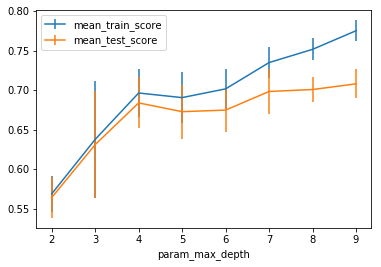

In [32]:
# visualization of grid search

scores.plot(x='param_max_depth', y='mean_train_score',
            yerr='std_train_score')

scores.plot(x='param_max_depth', y='mean_test_score',
            yerr='std_test_score', ax=plt.gca())

plt.legend()
plt.show()


In [33]:
grid.best_estimator_
            

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
# use the best model to predict

from sklearn.metrics import classification_report 

y_pred_grid = grid.best_estimator_.predict(X_test) 

print(classification_report(y_test, y_pred_grid))




              precision    recall  f1-score   support

           0       0.91      0.70      0.79      3881
           1       0.23      0.58      0.32       595

    accuracy                           0.68      4476
   macro avg       0.57      0.64      0.56      4476
weighted avg       0.82      0.68      0.73      4476



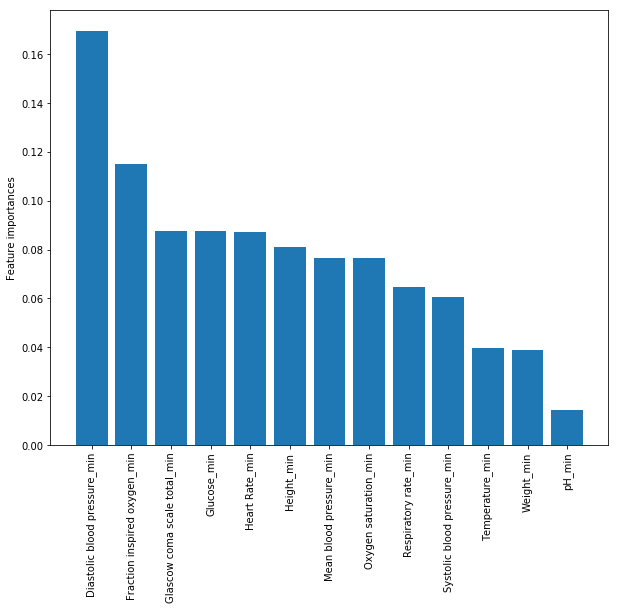

In [35]:
# feature importance
importances = grid.best_estimator_.feature_importances_ 

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))

plt.ylabel("Feature importances")

plt.bar(range(len(feature_used)), importances[indices], align="center") 

plt.xticks(range(len(feature_used)), feature_used, rotation=90)

plt.show()

## k-Nearest Neighor Classifier

In [36]:
# load data set into DataFrame

import pandas as pd

import numpy as np

data = pd.read_csv('data/in_hospital_mortality_48_day_min.csv', 
                  header = 0)

In [37]:
# To explore the number of cases (death) and controls (alive finally) 

n_case = len(data[data['label'] == 1])
n_control = len(data[data['label'] == 0]) 

print('Number of cases: ', n_case) 
print('Number of controls : ', n_control)
print()
print('Proportion of case: %.2f%%' % (100 * n_case / (n_control + n_case)))



Number of cases:  2423
Number of controls :  15480

Proportion of case: 13.53%


Text(0, 0.5, 'number of subjects')

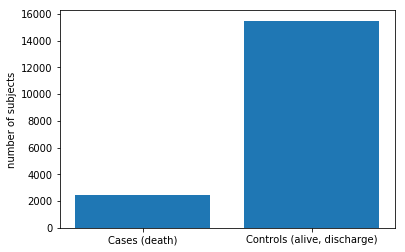

In [38]:
# visualize case-control distribution

import matplotlib.pyplot as plt
plt.bar(['Cases (death)','Controls (alive, discharge)'], [n_case, n_control]) 

plt.ylabel('number of subjects') 

In [39]:
# To assess missing values

print(data.isnull().sum() / len(data))

Subj                            0.000000
Capillary refill rate_min       0.981958
Diastolic blood pressure_min    0.011953
Fraction inspired oxygen_min    0.703458
Glascow coma scale total_min    0.419818
Glucose_min                     0.000950
Heart Rate_min                  0.011953
Height_min                      0.810926
Mean blood pressure_min         0.012065
Oxygen saturation_min           0.006703
Respiratory rate_min            0.012288
Systolic blood pressure_min     0.011953
Temperature_min                 0.019494
Weight_min                      0.270960
pH_min                          0.174663
label                           0.000000
dtype: float64


In [40]:
# drop feature 'Capillary refill rate_min' since high missingness

data = data.drop(columns = ['Capillary refill rate_min'])

In [41]:
data.drop(columns = ['label']).describe()

,Diastolic blood pressure_min,Fraction inspired oxygen_min,Glascow coma scale total_min,Glucose_min,Heart Rate_min,Height_min,Mean blood pressure_min,Oxygen saturation_min,Respiratory rate_min,Systolic blood pressure_min,Temperature_min,Weight_min,pH_min
count,17689.000000,5309.000000,10387.000000,17886.000000,17689.000000,3385.000000,17687.000000,17783.000000,17683.000000,17689.000000,17554.000000,13052.000000,14776.000000
mean,39.964459,0.422389,8.767113,95.307206,68.431251,168.548597,53.988573,84.016775,8.605129,85.950386,35.805119,81.416817,6.600238
std,12.032213,0.155498,4.790284,27.783699,14.676653,14.862592,15.226982,14.834182,5.549584,20.012562,2.135860,24.508092,1.955086
min,-13.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-37.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,34.000000,0.400000,3.000000,78.000000,59.000000,160.000000,48.000000,79.000000,3.000000,77.000000,35.555556,65.500000,5.500000
50%,41.000000,0.400000,8.000000,94.000000,68.000000,170.000000,55.000000,90.000000,9.000000,86.000000,36.000000,78.000000,7.240000
75%,47.000000,0.500000,14.000000,110.000000,78.000000,178.000000,62.000000,93.000000,13.000000,97.000000,36.388889,93.326554,7.350000
max,89.000000,1.000000,15.000000,592.000000,140.000000,429.000000,107.333000,100.000000,29.000000,157.000000,39.000000,280.000000,99.000000


In [42]:
# Split data into Training (75%) and Testing (25%) sets
from sklearn.model_selection import train_test_split 

y = data['label'].values

X = data.drop(columns = ['Subj', 'label']).values

feature_used = data.drop(columns = ['Subj', 'label']).columns.tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=0) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(13427, 13) (4476, 13) (13427,) (4476,)


In [43]:
# impute the missing values
from sklearn.impute import SimpleImputer

# if your sklearn version <= 0.20
# Do:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values=np.nan, strategy='mean')

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X_train)
X_train = np.array(imputer.transform(X_train), dtype=np.float32)
X_test = np.array(imputer.transform(X_test), dtype=np.float32)


**Note**

*For the non-tree-based machine learning models, such as KNN, logistic regression, and linear regression, data scaling is usually requried to eliminate the effects of magnitude.*

In [44]:
# Data scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # z-score based scaling

In [45]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [46]:
X_train_scaled

array([[-7.1436770e-02, -5.5176898e-08, -1.5860262e+00, ...,
        -7.4240786e-01,  1.8399764e+00,  2.7079245e-01],
       [ 5.9394932e-01, -5.5176898e-08,  1.4351804e+00, ...,
         4.2110077e-01, -7.6581484e-01,  3.8183460e-01],
       [ 5.9394932e-01, -5.5176898e-08, -7.6206082e-01, ...,
         4.7572085e-01, -8.8490957e-01,  4.0202403e-01],
       ...,
       [ 7.6029581e-01, -2.6942873e-01, -2.5691804e-08, ...,
         3.6646190e-01, -1.5431671e-01,  4.1716599e-01],
       [ 5.9394932e-01, -2.6942873e-01, -2.5691804e-08, ...,
         1.2065358e-01, -4.9904287e-01,  3.7173986e-01],
       [-1.4022088e+00, -5.5176898e-08,  1.7098355e+00, ...,
         1.4796457e-01,  3.8702145e-01, -9.2743221e-08]], dtype=float32)

In [47]:
# Train KNN classifier with Grid Search
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import GridSearchCV 

knn =KNeighborsClassifier()

In [48]:
grid = GridSearchCV(knn, 
                    param_grid={'n_neighbors':[5, 10, 15, 20, 25, 30, 35, 40]},
                    scoring='roc_auc',
                    cv=5,
                    return_train_score=True)

grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

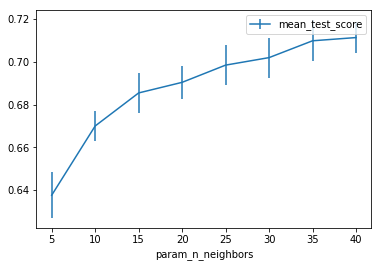

In [49]:
# To visualize tuning process

scores = pd.DataFrame(grid.cv_results_) 


scores.plot(x='param_n_neighbors', y='mean_test_score',
            yerr='std_test_score', ax=plt.gca())

plt.legend() 

plt.show()

In [50]:
# best model parameters 
print(grid.best_params_)

{'n_neighbors': 40}


Now, we can predict and plot ROC curve.

In [51]:
# make prediction on test set 
y_pred = grid.best_estimator_.predict(X_test)  # get predicted labels
print(y_pred)

y_proba = grid.best_estimator_.predict_proba(X_test) # get probabilities that belong to each class 
print(y_proba)

y_proba = y_proba[:,1]

[0 0 0 ... 0 0 0]
[[0.9   0.1  ]
 [0.8   0.2  ]
 [0.775 0.225]
 ...
 [0.8   0.2  ]
 [0.8   0.2  ]
 [0.825 0.175]]


In [52]:
from sklearn.metrics import roc_auc_score,roc_curve
#Create true and false positive rates
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test,y_proba)

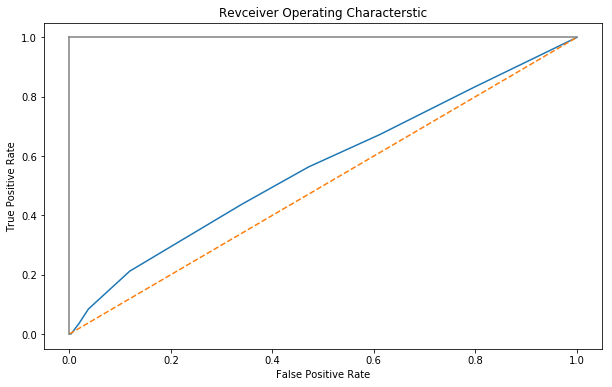

In [53]:
#Plot ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6)) 
plt.title('Revceiver Operating Characterstic') 
plt.plot(fpr_knn, tpr_knn) 
plt.plot([0,1],ls='--') 
plt.plot([0,0],[1,0],c='.5') 
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

In [54]:
#Calculate area under the curve
auc_knn = roc_auc_score(y_test, y_proba) 
print(auc_knn)

0.5629643663700987


# Logistic Regression Classifier

## Explore And Preprocess Data

In [55]:
# load data set into DataFrame
import pandas as pd
import numpy as np

data = pd.read_csv(TASK_FOLDER + 'in_hospital_mortality_48_day_min.csv', 
                   header = 0)

In [56]:
# explore the number of cases (death) and controls (alive) 
n_case = len(data[data['label'] == 1])
n_control = len(data[data['label'] == 0]) 

print('Number of cases: ', n_case) 
print('Number of controls : ', n_control)
print()
print('Proportion of case: %.2f%%' % (100 * n_case / (n_control + n_case)))

Number of cases:  2423
Number of controls :  15480

Proportion of case: 13.53%


Text(0, 0.5, 'number of subjects')

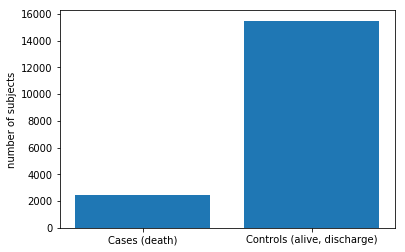

In [57]:
# visualize case-control distribution
import matplotlib.pyplot as plt

plt.bar(['Cases (death)','Controls (alive, discharge)'], [n_case, n_control]) 
plt.ylabel('number of subjects') 

In [58]:
# assess missing values
print(data.isnull().sum() / len(data))

Subj                            0.000000
Capillary refill rate_min       0.981958
Diastolic blood pressure_min    0.011953
Fraction inspired oxygen_min    0.703458
Glascow coma scale total_min    0.419818
Glucose_min                     0.000950
Heart Rate_min                  0.011953
Height_min                      0.810926
Mean blood pressure_min         0.012065
Oxygen saturation_min           0.006703
Respiratory rate_min            0.012288
Systolic blood pressure_min     0.011953
Temperature_min                 0.019494
Weight_min                      0.270960
pH_min                          0.174663
label                           0.000000
dtype: float64


In [59]:
# drop feature 'Capillary refill rate_min' due to its high missingness
data = data.drop(columns = ['Capillary refill rate_min'])

In [60]:
data.drop(columns = ['label']).describe()

,Diastolic blood pressure_min,Fraction inspired oxygen_min,Glascow coma scale total_min,Glucose_min,Heart Rate_min,Height_min,Mean blood pressure_min,Oxygen saturation_min,Respiratory rate_min,Systolic blood pressure_min,Temperature_min,Weight_min,pH_min
count,17689.000000,5309.000000,10387.000000,17886.000000,17689.000000,3385.000000,17687.000000,17783.000000,17683.000000,17689.000000,17554.000000,13052.000000,14776.000000
mean,39.964459,0.422389,8.767113,95.307206,68.431251,168.548597,53.988573,84.016775,8.605129,85.950386,35.805119,81.416817,6.600238
std,12.032213,0.155498,4.790284,27.783699,14.676653,14.862592,15.226982,14.834182,5.549584,20.012562,2.135860,24.508092,1.955086
min,-13.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-37.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,34.000000,0.400000,3.000000,78.000000,59.000000,160.000000,48.000000,79.000000,3.000000,77.000000,35.555556,65.500000,5.500000
50%,41.000000,0.400000,8.000000,94.000000,68.000000,170.000000,55.000000,90.000000,9.000000,86.000000,36.000000,78.000000,7.240000
75%,47.000000,0.500000,14.000000,110.000000,78.000000,178.000000,62.000000,93.000000,13.000000,97.000000,36.388889,93.326554,7.350000
max,89.000000,1.000000,15.000000,592.000000,140.000000,429.000000,107.333000,100.000000,29.000000,157.000000,39.000000,280.000000,99.000000


In [61]:
# split data into training (75%) and test (25%) sets
from sklearn.model_selection import train_test_split 

y = data['label'].values
X = data.drop(columns = ['Subj', 'label']).values
feature_used = data.drop(columns = ['Subj', 'label']).columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=0) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13427, 13) (4476, 13) (13427,) (4476,)


In [62]:
# impute the missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X_train)
X_train = np.array(imputer.transform(X_train), dtype=np.float32)
X_test = np.array(imputer.transform(X_test), dtype=np.float32)


In [63]:
# data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build The Logistic Regression Classifer

In [64]:
# build logistic regression classifer
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()

In [65]:
# set parameters for GridSearchCV 
params = {
    'penalty':['l2'],
    'C':[0.01,0.1,1,10,100, 200, 300], 
    'class_weight':['balanced',None]
}

In [66]:
# train model with grid search
grid = GridSearchCV(lr, param_grid=params, scoring='roc_auc', cv=10)
grid.fit(X_train,y_train)

# print best parameters choosen through GridSearchCV
grid.best_params_

{'C': 100, 'class_weight': None, 'penalty': 'l2'}

In [67]:
# make predictions on the test set 
y_pred = grid.best_estimator_.predict(X_test)
y_proba = grid.best_estimator_.predict_proba(X_test)[:,1] 

In [68]:
# output the precision, recall, and f1-score
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3881
           1       0.33      0.01      0.01       595

    accuracy                           0.87      4476
   macro avg       0.60      0.50      0.47      4476
weighted avg       0.80      0.87      0.81      4476



In [69]:
# create true and false positive rates
from sklearn.metrics import roc_auc_score,roc_curve 

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,y_proba)

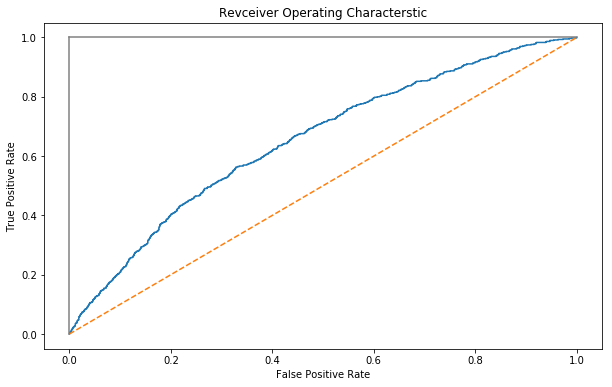

In [70]:
# plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6)) 
plt.title('Revceiver Operating Characterstic') 
plt.plot(fpr_lr, tpr_lr) 
plt.plot([0,1],ls='--') 
plt.plot([0,0],[1,0],c='.5') 
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [71]:
# calculate area under the curve
auc_lr = roc_auc_score(y_test, y_proba) 
print(auc_lr)

0.6522887846197483


## Evaluate Feature Importance

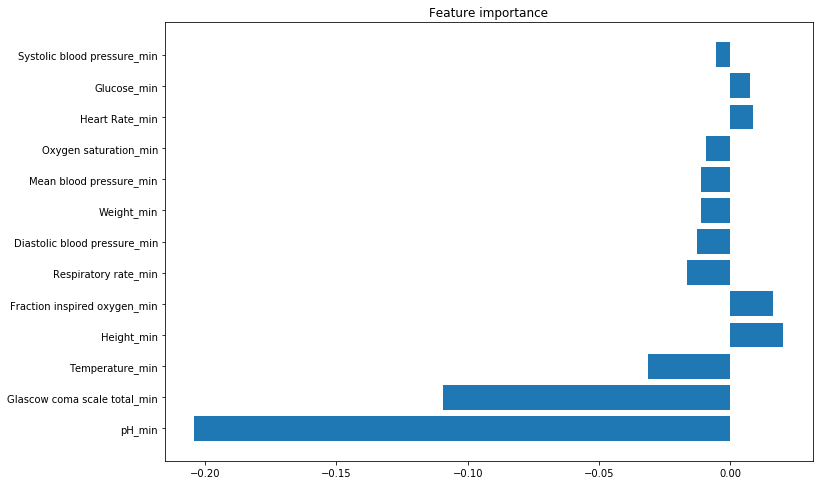

In [72]:
fig, ax = plt.subplots(figsize=(12, 7))
fig.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.08, hspace=.5, wspace=.15)
importances = grid.best_estimator_.coef_[0]
indices = np.argsort(abs(importances))[::-1]
plt.title("Feature importance")
plt.barh(list(range(X.shape[1]))[:], list(importances[indices])[:], align="center")
plt.yticks(list(range(X.shape[1]))[:], (np.array(feature_used)[indices]).tolist()[:])

plt.show()

## Improve Prediction Performance

Optimize the aggregation strategy to extract more information from the time sequence data, e.g., more chunks, more aggregation methods like max, min, mean, SD, etc.

In [73]:
# load data set into DataFrame
import pandas as pd
import numpy as np

data = pd.read_csv(TASK_FOLDER + 'in_hospital_mortality_48_day_chunk_12.csv', 
                   header = 0)

In [74]:
data.shape

(17903, 226)

Number of cases:  2423
Number of controls :  15480

Proportion of case: 13.53%


Text(0, 0.5, 'number of subjects')

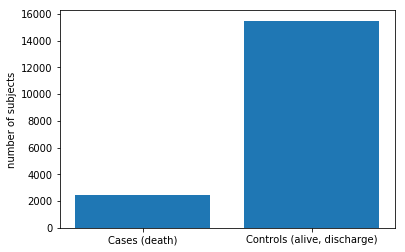

In [75]:
# explore the number of cases (death) and controls (alive) 
n_case = len(data[data['label'] == 1])
n_control = len(data[data['label'] == 0]) 

print('Number of cases: ', n_case) 
print('Number of controls : ', n_control)
print()
print('Proportion of case: %.2f%%' % (100 * n_case / (n_control + n_case)))

# visualize case-control distribution
import matplotlib.pyplot as plt

plt.bar(['Cases (death)','Controls (alive, discharge)'], [n_case, n_control]) 
plt.ylabel('number of subjects')

In [76]:
# assess missing values
print(data.isnull().sum() / len(data))

Subj                                 0.000000
Capillary refill rate_0_12_max       0.987935
Diastolic blood pressure_0_12_max    0.014299
Fraction inspired oxygen_0_12_max    0.740770
Glascow coma scale total_0_12_max    0.425739
                                       ...   
Systolic blood pressure_36_48_SD     0.016310
Temperature_36_48_SD                 0.031447
Weight_36_48_SD                      0.774004
pH_36_48_SD                          0.564710
label                                0.000000
Length: 226, dtype: float64


In [77]:
data.drop(columns = ['label']).describe()

,Capillary refill rate_0_12_max,Diastolic blood pressure_0_12_max,Fraction inspired oxygen_0_12_max,Glascow coma scale total_0_12_max,Glucose_0_12_max,Heart Rate_0_12_max,Height_0_12_max,Mean blood pressure_0_12_max,Oxygen saturation_0_12_max,Respiratory rate_0_12_max,...,Glucose_36_48_SD,Heart Rate_36_48_SD,Height_36_48_SD,Mean blood pressure_36_48_SD,Oxygen saturation_36_48_SD,Respiratory rate_36_48_SD,Systolic blood pressure_36_48_SD,Temperature_36_48_SD,Weight_36_48_SD,pH_36_48_SD
count,216.000000,17647.000000,4641.000000,10281.000000,17046.000000,17648.000000,2204.000000,17642.000000,17735.000000,1.762200e+04,...,15579.000000,17622.000000,374.0,17596.000000,17568.000000,17555.000000,17611.000000,17340.000000,4046.000000,7793.000000
mean,0.226852,98.887967,0.773646,12.078981,183.095858,101.577233,168.454174,100.991629,156.389715,1.598864e+02,...,14.759953,6.678145,0.0,8.785811,2.455197,3.445695,11.652259,0.410108,0.164228,0.071292
std,0.419769,1281.199556,0.273719,3.563513,135.325820,22.868323,15.802664,54.012306,7366.806319,1.774439e+04,...,23.902238,14.324916,0.0,14.490046,28.524254,1.941841,20.557926,15.107534,1.370730,0.235597
min,0.000000,25.000000,0.000000,3.000000,32.000000,33.000000,0.000000,31.000000,42.000000,2.000000e+00,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,68.000000,0.500000,10.000000,124.000000,87.000000,160.000000,86.000000,99.000000,2.100000e+01,...,0.000000,3.839669,0.0,5.576888,0.953794,2.247794,7.738643,0.120014,0.000000,0.000000
50%,0.000000,77.000000,1.000000,14.000000,157.000000,99.000000,170.000000,96.333298,100.000000,2.500000e+01,...,8.498366,5.527708,0.0,7.536863,1.443137,3.104249,10.449282,0.223766,0.000000,0.000000
75%,0.000000,89.000000,1.000000,15.000000,202.000000,115.000000,178.000000,109.000000,100.000000,2.900000e+01,...,20.000000,7.976014,0.0,10.208929,2.192158,4.271189,14.077938,0.366648,0.000000,0.020000
max,1.000000,114108.980000,7.100000,15.000000,9999.000000,941.000000,429.000000,6350.000000,981023.000000,2.355555e+06,...,763.718971,1815.476894,0.0,1763.124428,2875.574702,44.979162,2639.770787,1975.007058,50.000000,2.586492


In [78]:
# split data into training (70%) and test (30%) sets
from sklearn.model_selection import train_test_split 

y = data['label'].values
X = data.drop(columns = ['Subj', 'label']).values
feature_used = data.drop(columns = ['Subj', 'label']).columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, random_state=0) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12532, 224) (5371, 224) (12532,) (5371,)


In [79]:
# impute the missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = np.array(imputer.transform(X_train), dtype=np.float32)
X_test = np.array(imputer.transform(X_test), dtype=np.float32)

In [80]:
# data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# build logistic regression classifer
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()

# set parameters for GridSearchCV 
params = {
    'penalty':['l2'],
    'C':[1, 10, 100, 200], 
    'class_weight':['balanced', None],
}

# train model with Grid Search
grid = GridSearchCV(lr, param_grid=params, scoring='roc_auc', cv=10)
grid.fit(X_train,y_train)

# print best parameters choosen through GridSearchCV
grid.best_params_

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}

In [82]:
# make prediction on the test set 
y_pred = grid.best_estimator_.predict(X_test)
y_proba = grid.best_estimator_.predict_proba(X_test)[:,1] 

In [83]:
# output the precision, recall, and f1-score
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      4641
           1       0.23      0.60      0.34       730

    accuracy                           0.68      5371
   macro avg       0.58      0.65      0.56      5371
weighted avg       0.82      0.68      0.73      5371



In [84]:
# create true and false positive rates
from sklearn.metrics import roc_auc_score,roc_curve 

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,y_proba)

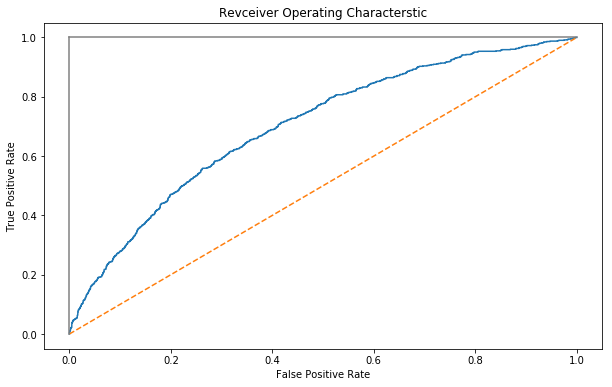

In [85]:
# plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6)) 
plt.title('Revceiver Operating Characterstic') 
plt.plot(fpr_lr, tpr_lr) 
plt.plot([0,1],ls='--') 
plt.plot([0,0],[1,0],c='.5') 
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')

plt.show()

In [86]:
# calculate area under the curve
auc_lr = roc_auc_score(y_test, y_proba) 
print(auc_lr)

0.7005112266192041


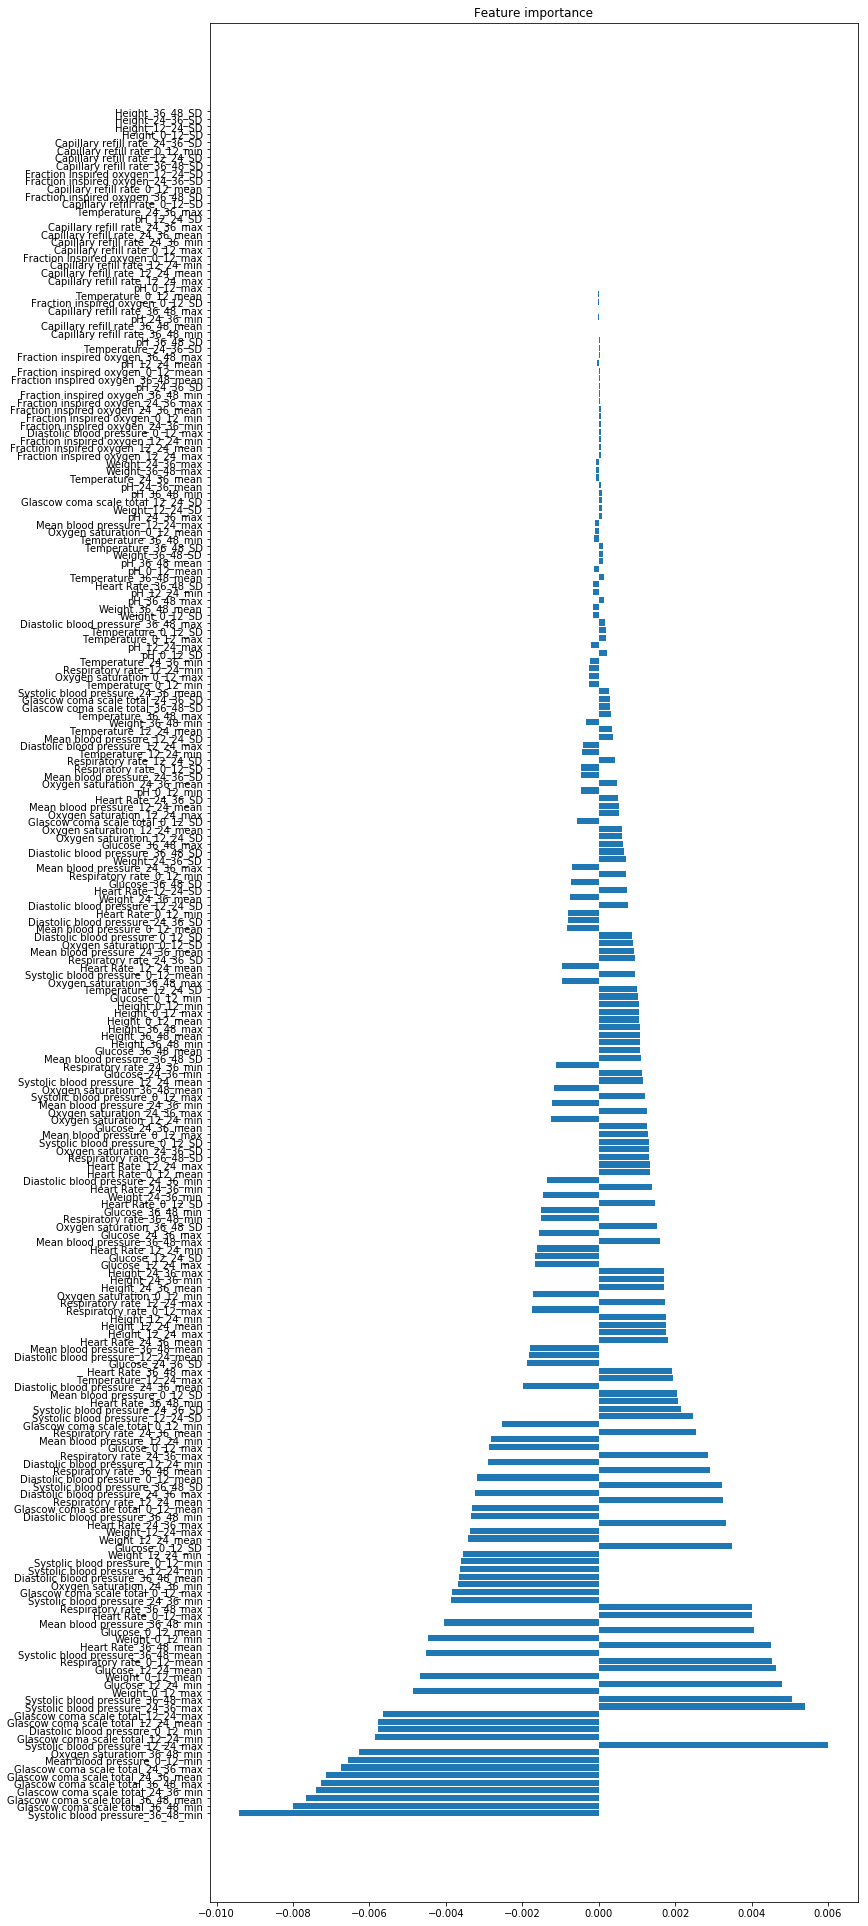

In [87]:
# visualize feature importance
fig, ax = plt.subplots(figsize=(12, 30))
fig.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.08, hspace=.5, wspace=.15)
importances = grid.best_estimator_.coef_[0]
indices = np.argsort(abs(importances))[::-1]
plt.title("Feature importance")
plt.barh(list(range(X.shape[1]))[:], list(importances[indices])[:], align="center")
plt.yticks(list(range(X.shape[1]))[:], (np.array(feature_used)[indices]).tolist()[:])

plt.show()